# Part II - (LOAN PROSPER DATA ANALYSIS)
## by (ADENIRAN KAYODE)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [75]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [76]:
# load in the dataset into a pandas dataframe
loan_dat = pd.read_csv('prosperLoanData.csv')
loan_dat.head()
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 'LoanStatus','BorrowerRate','ProsperScore',
        'EmploymentStatus','EstimatedLoss','BorrowerState','Occupation','EstimatedEffectiveYield','LenderYield','ProsperRating (numeric)','EstimatedReturn']
loan_feat = loan_dat[cols]
loan_hist = loan_feat[loan_feat["LoanStatus"] != "Current"]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [77]:
loan_hist["LoanStatus"] = (loan_hist["LoanStatus"] == "Completed").astype(int)
loan_hist = loan_feat[loan_feat["LoanStatus"] != "Current"]
loan_hist["LoanStatus"][:10]
borrower_fees = loan_feat["BorrowerAPR"] - loan_feat["BorrowerRate"]
borrower_fees.median()
estimated_loss_from_fees = loan_feat["BorrowerRate"] - loan_feat["EstimatedEffectiveYield"]
estimated_loss_from_fees.median()

0.01915

In [78]:
loan_feat["EstimatedEffectiveYield"].fillna(loan_feat["BorrowerRate"] - estimated_loss_from_fees.median(), inplace=True)
loan_feat["EstimatedEffectiveYield"].isnull().sum()
loan_feat["EstimatedLoss"].fillna(loan_feat["EstimatedLoss"].median(), inplace=True)
loan_feat["EstimatedLoss"].isnull().sum()
loan_feat["EstimatedReturn"].fillna(loan_feat["EstimatedEffectiveYield"] - loan_feat["EstimatedLoss"], inplace=True)
loan_feat["EstimatedReturn"].isnull().sum()
loan_feat["ProsperRating (numeric)"].fillna(loan_feat["ProsperRating (numeric)"].median(), inplace=True)
loan_feat["ProsperScore"].fillna(loan_feat["ProsperScore"].median(), inplace=True)
loan_feat["ProsperRating (numeric)"].isnull().sum(), loan_feat["ProsperScore"].isnull().sum()

(0, 0)

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

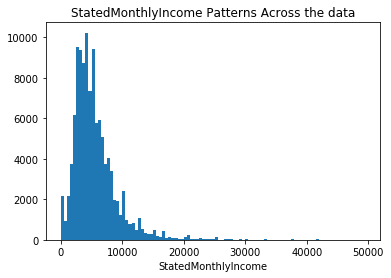

In [79]:
bins_smi = np.arange(0, 50000,500)
plt.hist(data = loan_feat, x = 'StatedMonthlyIncome', bins=bins_smi)
plt.xlabel('StatedMonthlyIncome')
plt.title('StatedMonthlyIncome Patterns Across the data');

The monthly income chat is right screwed most of the income are less than 30k dollars. So people with icome above 30k dollars are not really active on the loan data.

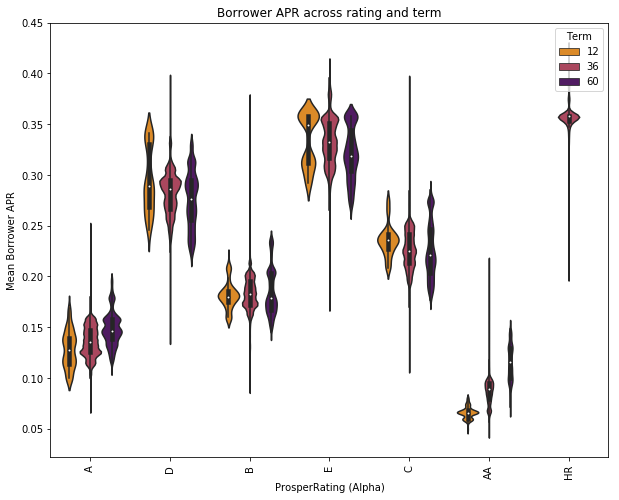

In [80]:
## (Visualization 2)
fig = plt.figure(figsize = [10,8])
ax = sb.violinplot(data = loan_feat, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'inferno_r', linestyles = '', dodge = 0.5, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True)
plt.xticks(rotation = 90);

We can deduce that the borrower APR decrease with the increase in the terms for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

In [81]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate','StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

## (Visualization 3)



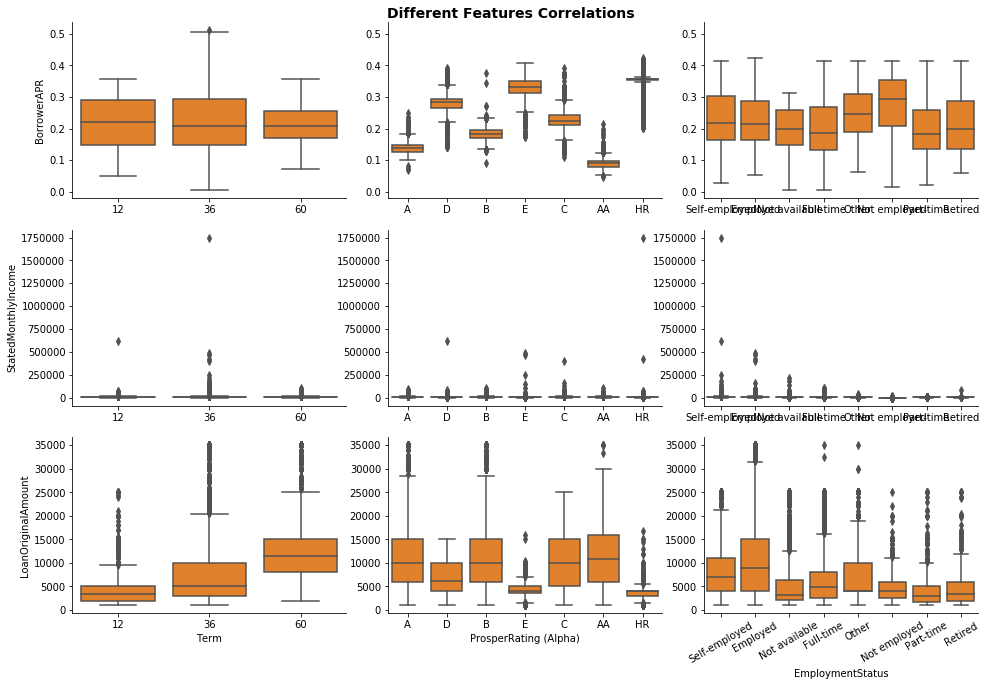

In [82]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[1]
    sb.boxplot(x, y, color = default_color)
g = sb.PairGrid(data = loan_feat, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, size = 3, aspect = 1.5);
plt.suptitle("DIFFERENT FEATURES CORRELATIONS".title(), y = 1, fontsize = 14, weight = "bold");
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. 
The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. 
It means that the Prosper rating has a strong effect on borrower APR. 
Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed 
and full time borrowers have more monthly income and loan amount than part-time, 
retired and not employed borrowers.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [83]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 437639 bytes to Part_II_slide_deck_template.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
